In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [5]:
# Put the directory of the datasets here
os.chdir(r"/content/drive/My Drive/STA-ML")

path = os.getcwd()
print(path)

/content/drive/My Drive/STA-ML


In [44]:
# Load data into DataFrame
train_data = pd.read_csv(path+'/dexter/dexter_train.csv',header=None)
test_data = pd.read_csv(path+'/dexter/dexter_valid.csv',header=None)
train_labels = pd.read_csv(path+'/dexter/dexter_train.labels',header=None)
test_labels = pd.read_csv(path+'/dexter/dexter_valid.labels',header=None)
# Add a foward column  of 1's on training datafor the linear constant

#data.insert(0,'const',1)

print(train_data)
print(train_labels)

     0      1      2      3      4      ...  19995  19996  19997  19998  19999
0        0      0      0      0      0  ...      0      0      0      0     56
1        0      0      0      0      0  ...      0      0      0      0      0
2        0      0      0      0      0  ...      0      0      0      0      0
3        0      0      0      0      0  ...      0      0      0      0      0
4        0      0      0      0      0  ...      0      0      0      0      0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
295      0      0      0      0      0  ...      0      0      0      0      0
296      0      0      0      0      0  ...      0      0      0      0      0
297      0      0      0      0      0  ...      0      0      0      0      0
298      0      0      0      0      0  ...      0      0      0      0      0
299      0      0      0      0      0  ...      0      0      0      0      0

[300 rows x 20000 columns]
     0
0    1
1   -1
2  

In [45]:
ss=StandardScaler()
ss.fit(train_data)
X_train=ss.transform(train_data)
X_test=ss.transform(test_data)

print(X_train.shape)

(300, 20000)


In [46]:
tf_X_train = X_train.T
tf_X_test = X_test.T
y_train=train_labels.replace(-1,0)
y_test=test_labels.replace(-1,0)

In [47]:
theta = np.zeros((X_train.shape[1],1))
cost = []
lamb = 0.0001
eta = 0.1
m  = X_train.shape[0]
p = X_train.shape[1]
mu = 30
k = 30
Niter = 500
for i in range(1,Niter):
  z = np.dot(theta.T, tf_X_train)
  A = 1/(1+(np.exp(-z)))
  cost.append((-1/m) * np.sum(y_train.values.T * np.log(A) + (1 - y_train.values.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
  theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train.values))/m) - (eta * (lamb/m) * theta)
  temp = (Niter-(2*i))/((2*i*mu)+Niter)
  mi = int(k + ((p-k)*max(0,temp)))
  if mi > k :
    sorted = np.sort(theta,axis=0)
    reverse_sorted = np.flip(sorted, axis=None)
    temp1 = reverse_sorted[0:mi,0]
    for j,lol in enumerate(theta):
      if lol in temp1:
        pass
      else:
        theta[j,0]=0
 # print(i,mi)

Text(0, 0.5, 'Loss')

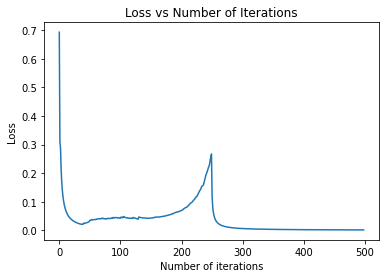

In [48]:
plt.plot(range(499),cost)
plt.title("Loss vs Number of Iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")

In [49]:
Z_train = np.dot(theta.T,tf_X_train)
h_x_train = 1/(1+np.exp(-Z_train))
y_pred_train = np.where(h_x_train<0.5,0,1)
Z_test = np.dot(theta.T,tf_X_test)
h_x_test = 1/(1+np.exp(-Z_test))
y_pred_test = np.where(h_x_test<0.5,0,1)
train_error = (1-accuracy_score(y_train,y_pred_train.T))
test_error = (1-accuracy_score(y_test, y_pred_test.T))

missclass_train = train_error * X_train.shape[0] 
missclass_test = test_error * X_test.shape[0]

In [50]:
print(train_error, missclass_train, test_error, missclass_test)

0.0 0.0 0.12 36.0


In [61]:
def FSA(Niter, ki, mu, lamb, eta, X_train, X_test, y_train, y_test):
  theta = np.zeros((X_train.shape[1],1))
  m = X_train.shape[0]
  p = X_train.shape[1]
  cost = []
  train_error =[] 
  test_error = []
  missclass_train = [] 
  missclass_test = []

  tf_X_train = X_train.T
  tf_X_test = X_test.T

  for k in range(len(ki)):
    temp = []
    for i in range(1,Niter):
      z = np.dot(theta.T, tf_X_train)
      A = 1/(1+(np.exp(-z)))
      temp.append((-1/m) * np.sum(y_train.values.T * np.log(A) + (1 - y_train.values.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
      theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train.values))/m) - (eta * (lamb/m) * theta)
      sel = (Niter-(2*i))/((2*i*mu)+Niter)
      mi = int(ki[k] + ((p-k)*max(0,sel)))
      if mi > ki[k] :
        sorted = np.sort(theta,axis=0)
        reverse_sorted = np.flip(sorted, axis=None)
        temp1 = reverse_sorted[0:mi,0]
        for j,lol in enumerate(theta):
          if lol in temp1:
            pass
          else:
            theta[j,0]=0

    cost.append(temp)

    Z_train = np.dot(theta.T,tf_X_train)
    h_x_train = 1/(1+np.exp(-Z_train))
    y_pred_train = np.where(h_x_train<0.5,0,1)
    Z_test = np.dot(theta.T,tf_X_test)
    h_x_test = 1/(1+np.exp(-Z_test))
    y_pred_test = np.where(h_x_test<0.5,0,1)
    train_score = 1-accuracy_score(y_train,y_pred_train.T)
    test_score = 1-accuracy_score(y_test, y_pred_test.T)
    train_error.append(train_score)
    test_error.append(test_score)

    missclass_train.append(train_score * X_train.shape[0])
    missclass_test.append(test_score * X_test.shape[0])

  return cost, train_error, test_error, missclass_train, missclass_test


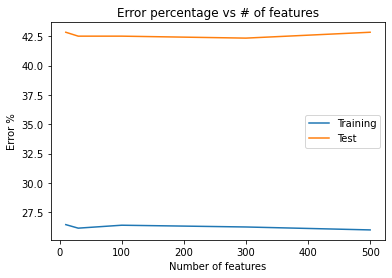

[0.26449999999999996, 0.26149999999999995, 0.264, 0.26249999999999996, 0.26] [0.42833333333333334, 0.42500000000000004, 0.42500000000000004, 0.42333333333333334, 0.42833333333333334]


In [62]:
n = 500
k_array = [10, 30, 100, 300, 500]
eta = 0.1

FSA_loss, train_error, test_error, training_miss, test_miss = FSA(n, k_array, mu, lamb, eta, X_train, X_test, y_train, y_test)


plt.plot(k_array, np.asarray(train_error)*100, label = "Training") 
plt.plot(k_array, np.asarray(test_error)*100, label = "Test")
plt.title('Error percentage vs # of features')
plt.xlabel('Number of features')
plt.ylabel("Error %")
plt.legend()
plt.show()


print(train_error, test_error)

In [63]:
train = pd.read_csv(path + "/MADELON/madelon_train.data",sep =' ',header=None)
train_label = pd.read_csv(path + "/MADELON/madelon_train.labels",sep =' ',header=None)
test = pd.read_csv(path + "/MADELON/madelon_valid.data",sep =' ',header=None)
test_label = pd.read_csv(path + "/MADELON/madelon_valid.labels",sep =' ',header=None)

print(train.head())
print(test.head())
print(test_label.head())

   0    1    2    3    4    5    6    ...  494  495  496  497  498  499  500
0  485  477  537  479  452  471  491  ...  511  485  481  479  475  496  NaN
1  483  458  460  487  587  475  526  ...  513  486  483  492  510  517  NaN
2  487  542  499  468  448  471  442  ...  506  501  480  489  499  498  NaN
3  480  491  510  485  495  472  417  ...  454  469  475  482  494  461  NaN
4  484  502  528  489  466  481  402  ...  486  508  481  504  495  511  NaN

[5 rows x 501 columns]
   0    1    2    3    4    5    6    ...  494  495  496  497  498  499  500
0  483  454  513  495  523  469  453  ...  413  520  485  498  523  510  NaN
1  485  508  493  487  478  472  504  ...  514  452  484  495  548  477  NaN
2  483  521  507  475  493  486  421  ...  508  528  486  465  508  503  NaN
3  474  504  576  480  553  483  524  ...  509  525  479  467  552  517  NaN
4  495  474  523  479  495  488  485  ...  509  520  475  493  506  491  NaN

[5 rows x 501 columns]
   0
0 -1
1 -1
2 -1
3  1
4 -

In [64]:
train = train.drop(columns=[500])
test = test.drop(columns=[500])
print(train.head())

   0    1    2    3    4    5    6    ...  493  494  495  496  497  498  499
0  485  477  537  479  452  471  491  ...  485  511  485  481  479  475  496
1  483  458  460  487  587  475  526  ...  338  513  486  483  492  510  517
2  487  542  499  468  448  471  442  ...  650  506  501  480  489  499  498
3  480  491  510  485  495  472  417  ...  572  454  469  475  482  494  461
4  484  502  528  489  466  481  402  ...  435  486  508  481  504  495  511

[5 rows x 500 columns]


In [65]:
print(test.shape)
ss2=StandardScaler()
ss2.fit(train)
X_train=ss2.transform(train)
X_test=ss2.transform(test)

(600, 500)


In [66]:
y_train=train_label.replace(-1,0)
y_test=test_label.replace(-1,0)

print(X_train.shape)

(2000, 500)


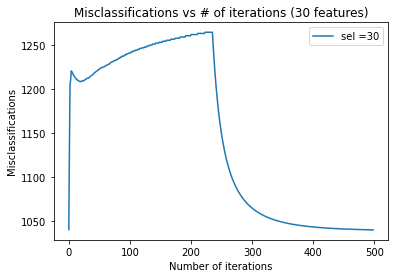

In [78]:
#For Madelon data
n = 500
k_array = [10, 30, 100, 300, 500]
eta = 0.15



FSA_loss, train_error, test_error, training_miss, test_miss = FSA(n, k_array, mu, lamb, eta, X_train, X_test, y_train, y_test)

plt.plot(np.arange(n-1), np.asarray(FSA_loss[1]) * X_train.shape[0],label='sel ='+ str(k_array[1])) 
plt.title('Misclassifications vs # of iterations (30 features)')
plt.xlabel('Number of iterations')
plt.ylabel("Misclassifications")
plt.legend()
plt.show()


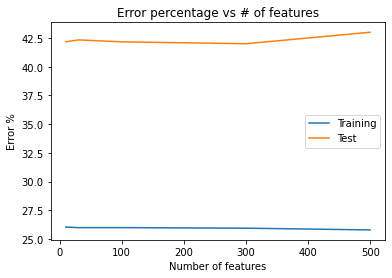

[0.26049999999999995, 0.26, 0.26, 0.25949999999999995, 0.258] [0.42166666666666663, 0.42333333333333334, 0.42166666666666663, 0.42000000000000004, 0.43000000000000005]


In [79]:
plt.plot(k_array, np.asarray(train_error)*100, label = "Training") 
plt.plot(k_array, np.asarray(test_error)*100, label = "Test")
plt.title('Error percentage vs # of features')
plt.xlabel('Number of features')
plt.ylabel("Error %")
plt.legend()
plt.show()


print(train_error, test_error)

